<a href="https://colab.research.google.com/github/adheeb4/7PAM2015-0105-2023-Individual-Project/blob/main/Individual_Project_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fiftyone
!pip install fiftyone-db==0.4.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.2/677.2 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.p

In [2]:
import fiftyone as fo
import fiftyone.zoo as foz
import numpy as np
import cv2
import matplotlib.pyplot as plt

Migrating database to v0.23.5


INFO:fiftyone.migrations.runner:Migrating database to v0.23.5


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

dataset_dir = "/content/drive/MyDrive/data"

train_dataset_dir = "/content/drive/MyDrive/data/train-300"
test_dataset_dir = "/content/drive/MyDrive/data/test-30"
validation_dataset_dir = "/content/drive/MyDrive/data/validation-300"


dataset_type = fo.types.COCODetectionDataset



train_dataset = fo.Dataset.from_dir(
    dataset_dir=train_dataset_dir,
    dataset_type=dataset_type,
    name="train"
)


validation_dataset = fo.Dataset.from_dir(
    dataset_dir=validation_dataset_dir,
    dataset_type=dataset_type,
    name="validation"
)

# Load the test images into a FiftyOne dataset (no annotations)
test_dataset = fo.Dataset.from_dir(
    dataset_dir=test_dataset_dir,
    dataset_type=fo.types.ImageDirectory,
    name="test"
)



 100% |█████████████████| 300/300 [11.2s elapsed, 0s remaining, 27.8 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [11.2s elapsed, 0s remaining, 27.8 samples/s]      


 100% |█████████████████| 300/300 [11.6s elapsed, 0s remaining, 20.3 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 300/300 [11.6s elapsed, 0s remaining, 20.3 samples/s]      


 100% |███████████████████| 30/30 [50.9ms elapsed, 0s remaining, 589.6 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 30/30 [50.9ms elapsed, 0s remaining, 589.6 samples/s]     


In [9]:

print(train_dataset)
print(test_dataset)
print(validation_dataset)

Name:        train
Media type:  image
Num samples: 300
Persistent:  False
Tags:        []
Sample fields:
    id:            fiftyone.core.fields.ObjectIdField
    filepath:      fiftyone.core.fields.StringField
    tags:          fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:      fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    detections:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
Name:        test
Media type:  image
Num samples: 30
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
Name:        validation
Media type:  image

In [10]:
session = fo.launch_app(train_dataset)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.5

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.23.5

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [8]:
session = fo.launch_app(test_dataset)

In [ ]:


def preprocess(sample, resize_shape=(256, 256)):
  image_data = cv2.imread(sample.filepath)
  binary_mask = np.zeros(image_data.shape[:2], dtype=np.uint8)

  detections = sample["detections"]
  if detections is not None:
    for detection in detections.values():
      for seg in detection.segmentation:
        cv2.fillPoly(binary_mask, [np.array(seg)], 255)
  #for seg in sample.mask.ground_truth.segmentation:
   # cv2.fillPoly(binary_mask, np.array(seg), 255)
  if resize_shape:
    image_data = cv2.resize(image_data, resize_shape)
    binary_mask = cv2.resize(binary_mask, resize_shape, interpolation=cv2.INTER_NEAREST)

  image_data = image_data / 255.0

  return image_data, binary_mask


preprocessed_images = []
preprocessed_masks = []

for sample in dataset:
 # image = sample["image"]
#mask = sample["ground_truth"]

  preprocessed_image, preprocessed_mask = preprocess(sample)

  preprocessed_images.append(preprocessed_image)
  preprocessed_masks.append(preprocessed_mask)


KeyError: "Sample has no field 'detections'"

In [ ]:
view = dataset.view()

In [ ]:
print(view)

Dataset:     coco-2017-train-validation-test-100
Media type:  image
Num samples: 300
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    ---


In [ ]:
print(len(view))

view.media_type

300


'image'

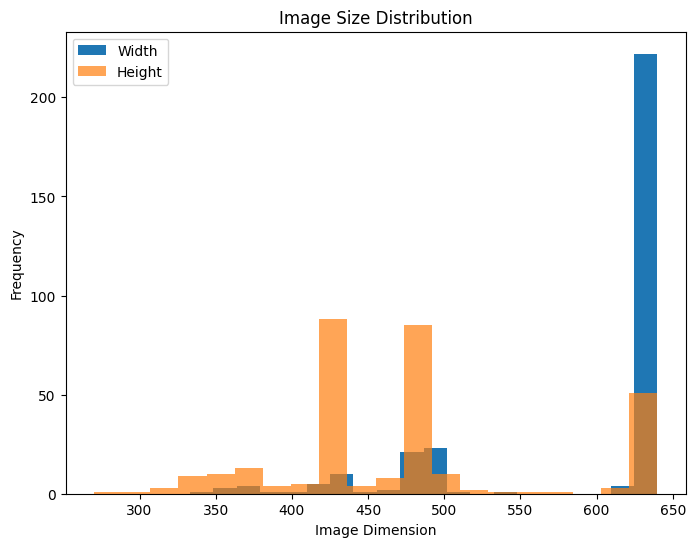

In [9]:
"""
# Access images and their dimensions
images = list(view)  # Get a list of all samples in the dataset
image_sizes = [(img["image"].shape[0], img["image"].shape[1]) for img in images]

# Plot image size distribution
plt.figure(figsize=(8, 6))
plt.hist([w for (w, h) in image_sizes], bins=20, label="Width")
plt.hist([h for (w, h) in image_sizes], bins=20, alpha=0.7, label="Height")
plt.legend()
plt.xlabel("Image Dimension")
plt.ylabel("Frequency")
plt.title("Image Size Distribution")
plt.show()
"""
import matplotlib.pyplot as plt
# Access file paths of images

filepaths = [sample.filepath for sample in train_dataset]

# Plot image size distribution
image_sizes = []
for filepath in filepaths:
    # Load image and get dimensions
    image = plt.imread(filepath)
    if len(image.shape) == 2:  # Grayscale image
        height, width = image.shape
    else:  # Color image
        height, width, _ = image.shape
    image_sizes.append((width, height))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist([w for (w, h) in image_sizes], bins=20, label="Width")
plt.hist([h for (w, h) in image_sizes], bins=20, alpha=0.7, label="Height")
plt.legend()
plt.xlabel("Image Dimension")
plt.ylabel("Frequency")
plt.title("Image Size Distribution")
plt.show()

In [ ]:
view.update(fields="image", value=preprocessed_image)

NameError: name 'view' is not defined